On this page, you will review how to grab NAIP data from the Earth Explorer website. The Earth Explorer website is a data portal run by the USGS. Here you can find many different types of remote sensing and other data for both the US and in some cases, the globe.

 IMPORTANT: Be sure to order your data several days ahead of time or else you won’t have it in time to finish your homework.

How to Download Landsat Remote Sensing Data from Earth Explorer
Step 1: Define Your Study Area (AOI)
When searching for data, the first thing that you need to do is to define your area of interest (AOI). Your AOI for this week, is defined by the boundary of the Cold Springs fire extent. You could type in the x,y vertices of each corner of the boundary, but if you have an Earth Explorer account, you can upload a ZIPPED up shapefile that contains the boundary instead.

Important: Be sure to use a square / rectangular extent polygon. If you have too many vertices in your extent polygon, the website won’t accept it as an extent file.

To define your AOI in Earth Explorer:

Zip up extent file that you want to use. Be sure to use a square extent, if you have too many vertices it won’t work. Lucky for us there is a zip file already zipped up and ready to go in the cold-springs-fire directory!

data/cold-springs-fire/vector_layers/fire_boundary_box_shp.zip

Next, go to the Earth Explorer website. Login. If you don’t have a login already, create an account.

Be sure to create an account. You will need it to be able to use your shapefile extent to search for data. Now, it’s time to search for data.

In the search criteria, click on shapefile tab. Select the zip file above as the shapefile that represents the SPATIAL EXTENT of our study area - the cold springs fire site.

At the bottom of the search criteria window, select a range of dates. A month before and after the fire is a nice starting point.

Step 2: Define the Data That You Want to Download
Next click on the Data sets tab. Notice that there are a lot of different data available from Earth Explorer! You want to find NAIP data which is under the Aerial Imagery category. Select:

NAIP GEOTIFF

Step 3: Click on Results
Finally click on the Results tab. Here you see all of the NAIP tiles that are available to “order” from the website that cover your study area.

Notice that you can click on the icons below the scene to see the scene itself rendered on the map and to see the footprint (or extent) of the scene relative to our study area.

Pick a scene that is:

closest to the year following the pre-fire date (summer / fall 2017).
HINT: view the footprint of the data in Earth Explorer to pick the tile the best covers your study area. There are a few tiles that cover some of the study area but only one that covers the entire area!

Step 4: Download Your Data
Click the  download icon (3rd from the right) to download the image
Place the image in your earth-analytics directory to use for your homework.
Explore Newly Downloaded Data
Once you have downloaded the data, explore it a bit. You will likely notice that the spatial extent of the newly downloaded data is DIFFERENT from the data in the class cold-springs-fire directory. Be sure to account for that when you are doing your homework for this week!

In [5]:
import geopandas as gpd
import contextily as cx

In [3]:
fire = gpd.read_file("data/data/cold-springs-fire/vector_layers/fire_crop_box_500m.shp")

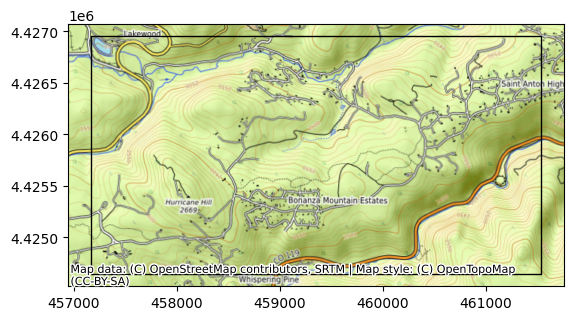

In [16]:
ax = fire.plot(facecolor="none")
cx.add_basemap(ax=ax, source=cx.providers.OpenTopoMap, crs=fire.crs)

In [14]:
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt
from earthpy.plot import _stretch_im

In [2]:
naip = rxr.open_rasterio("data/m_3910505_nw_13_1_20170902.tif")

(array([1.9742608e+07, 5.0907236e+07, 3.8800538e+07, 2.3156181e+07,
        1.7539216e+07, 1.3096184e+07, 1.0249155e+07, 6.9722490e+06,
        1.7835840e+06, 2.1785000e+04]),
 array([  1. ,  24.7,  48.4,  72.1,  95.8, 119.5, 143.2, 166.9, 190.6,
        214.3, 238. ]),
 <BarContainer object of 10 artists>)

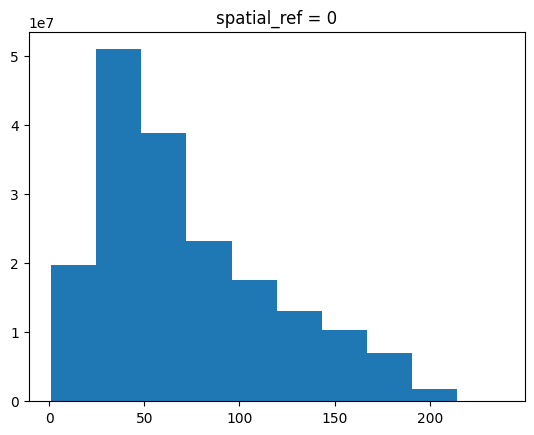

In [5]:
naip.plot.hist()

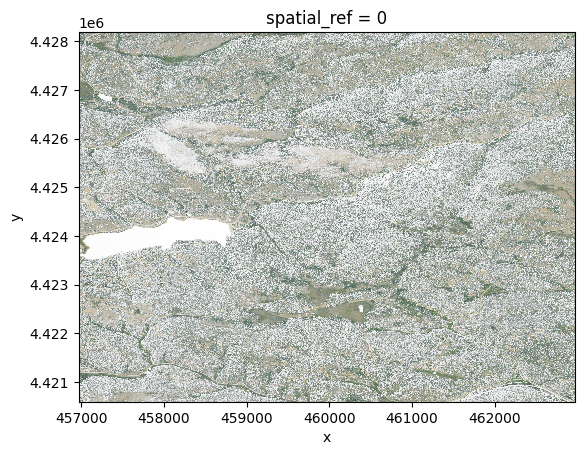

In [6]:
naip.plot.imshow()

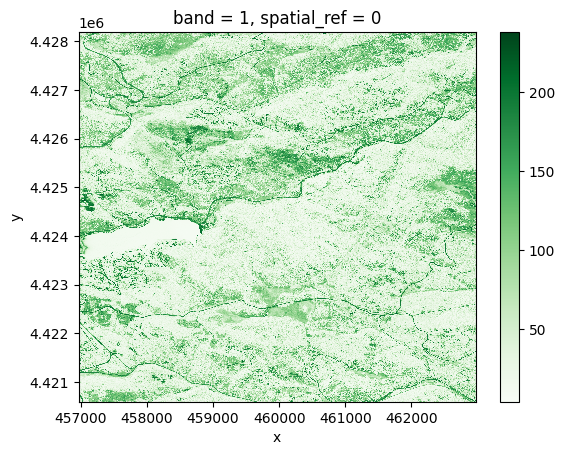

In [7]:
naip[0].plot.imshow(cmap="Greens")

In [10]:
stretched_naip = _stretch_im(naip, 2)

In [19]:
import xarray


stretched_naip = xarray.DataArray(stretched_naip)

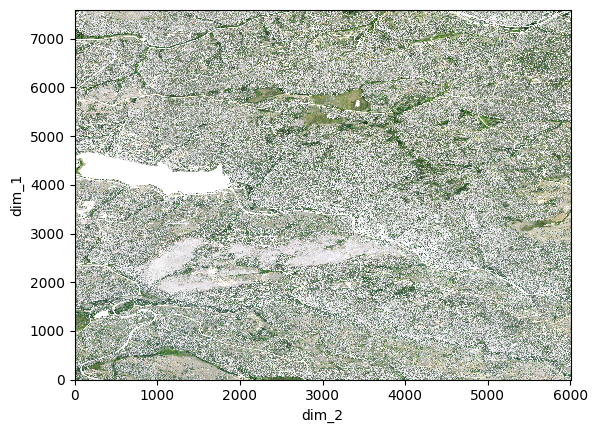

In [20]:
stretched_naip.plot.imshow()

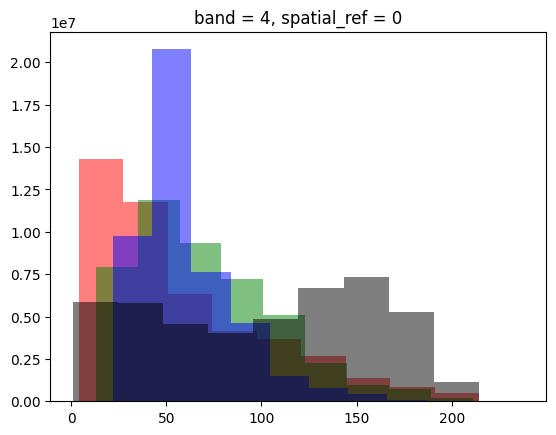

In [25]:
colors = ["red", "green", "blue", "Black"]

for band in range(naip.shape[0]):
    naip[band].plot.hist(color=colors[band], alpha=0.5)

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

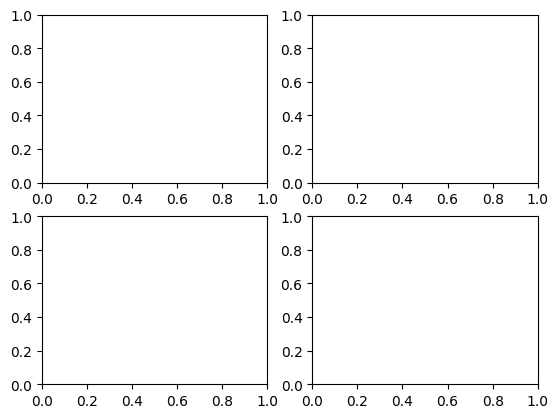

In [31]:
colors = ["red", "green", "blue", "Black"]
f, axs = plt.subplots(ncols=2, nrows=2)

for band in range(naip.shape[0]):
    naip[band].plot.hist(color=colors[band], alpha=0.5, ax=axs[band])